In [1]:
import numpy as np
import scipy.stats as si
import sympy as sy
import pandas as pd

In [2]:
def stock_profit_loss(sT, purchase_price):
    return np.where(sT >= 0, sT - purchase_price, 0)  

def call_profit_loss(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

def put_profit_loss(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium 

## 2. Profit/Loss of NVDA Straddle 


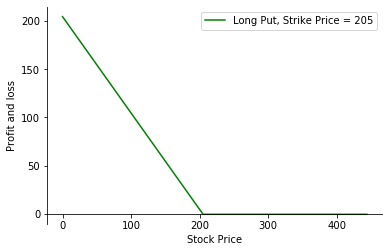

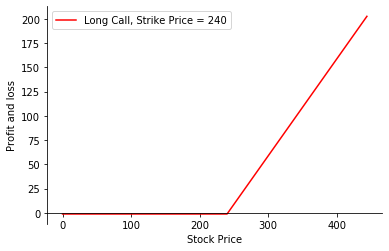

Max Profit of Straddle: Unlimited
Max Loss: -1.75


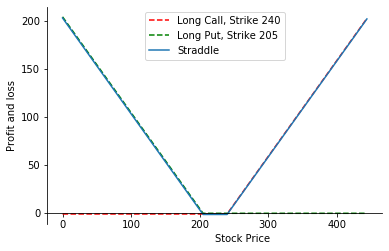

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# PNB stock price 
spot_price = 222.22

# Long put
strike_price_long_put = 205 
premium_long_put = 0.52

# Long call
strike_price_long_call = 240 
premium_long_call = 1.23

# Stock price range at expiration of the put
sT = np.arange(0,2*spot_price,1) 

#Put profit_loss
#We define a function that calculates the profit_loss from buying a put option. The function takes sT which is a range of possible values of stock price at expiration, strike price of the put option and premium of the put option as input. It returns the put option profit_loss.

profit_loss_long_put = put_profit_loss(sT, strike_price_long_put, premium_long_put)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,profit_loss_long_put,label='Long Put, Strike Price = 205',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()



profit_loss_long_call = call_profit_loss (sT, strike_price_long_call, premium_long_call)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,profit_loss_long_call,label='Long Call, Strike Price = 240',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

#Straddle
# Straddle profit_loss

profit_loss_straddle = profit_loss_long_call + profit_loss_long_put

print ("Max Profit of Straddle: Unlimited")
print ("Max Loss:", min(profit_loss_straddle))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,profit_loss_long_call,'--',label='Long Call, Strike 240',color='r')
ax.plot(sT,profit_loss_long_put,'--',label='Long Put, Strike 205',color='g')

ax.plot(sT,profit_loss_straddle,label='Straddle')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()



### QCOM Protective Put

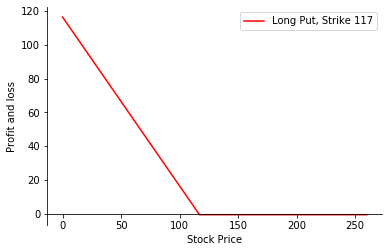

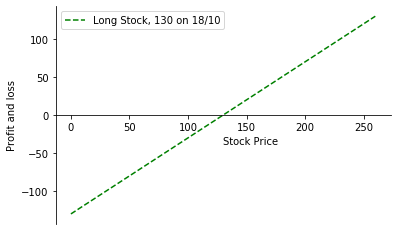

Max Profit of protective_put: Unlimited
Max Loss: -13.540000000000006


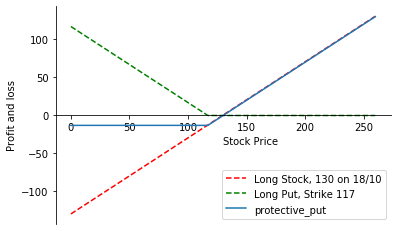

In [4]:
spot_price = 130.12

# Long put
strike_price_long_put = 117 
premium_long_put = 0.54

# Stock price range at expiration of the put
sT = np.arange(0,2*spot_price,1) 
#long put

profit_loss_long_put = put_profit_loss(sT, strike_price_long_put, premium_long_put)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,profit_loss_long_put,label='Long Put, Strike 117',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

#long stock
profit_loss_long_stock = stock_profit_loss(sT, 130)

# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,profit_loss_long_stock,'--',label='Long Stock, 130 on 18/10',color='g')

plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

#protective put

profit_loss_protective_put = profit_loss_long_stock + profit_loss_long_put

print ("Max Profit of protective_put: Unlimited")
print ("Max Loss:", min(profit_loss_protective_put))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,profit_loss_long_stock,'--',label='Long Stock, 130 on 18/10',color='r')
ax.plot(sT,profit_loss_long_put,'--',label='Long Put, Strike 117',color='g')

ax.plot(sT,profit_loss_protective_put,label='protective_put')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()
